**1. Data Collection and Preprocessing**

In [6]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# Load the data

df = pd.read_csv('/content/data_news - data_news.csv')

#display the data

print(df.head())
print(df.info())
print("shape:",df.shape)


#checing any null values

print("\nNull values",df.isnull().sum() )

   category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to 

**Combine Headline and Description**

In [8]:
# combine headline and short_description

df["text"] = df["headline"]+" "+df["short_description"]
df.head()

,category,headline,links,short_description,keywords,text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons,143 Miles in 35 Days: Lessons Learned Resting ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy,Talking to Yourself: Crazy or Crazy Helpful? T...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug,Crenezumab: Trial Will Gauge Whether Alzheimer...
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life,"Oh, What a Difference She Made If you want to ..."
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods,"Green Superfoods First, the bad news: Soda bre..."


**Clean Text:**

In [9]:
def clean_text(text):
  text = str(text).lower()
  text = re.sub(r"[^a-z\s]","",text)
  return text

#apply clean_text function on Dataset

df["clean_text"] = df["text"].apply(clean_text)

print(df[["headline","short_description","clean_text"]].head())



                                            headline  \
0              143 Miles in 35 Days: Lessons Learned   
1       Talking to Yourself: Crazy or Crazy Helpful?   
2  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3                     Oh, What a Difference She Made   
4                                   Green Superfoods   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                                          clean_text  
0   miles in  days lessons learned resting is par...  
1  talking to yourself crazy or crazy helpful thi...  
2  crenezumab trial will gauge whether alzheimers...  
3  oh what a difference she made if you want to b...  
4  green superfoods first the bad news soda bread..

**Explore Cateogries**

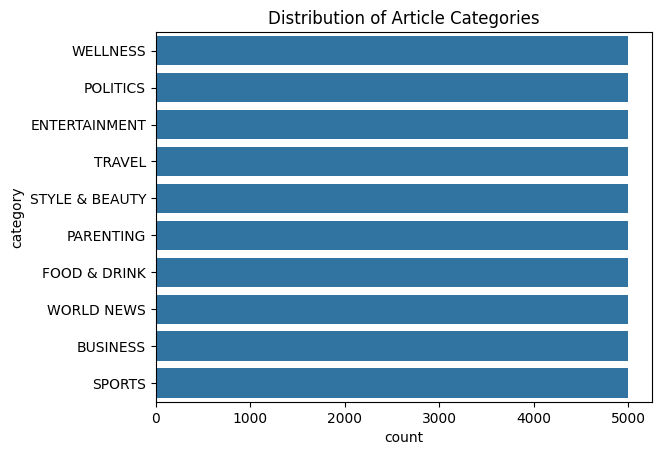

In [10]:
sns.countplot(y="category",data=df,order=df["category"].value_counts().index)

plt.title("Distribution of Article Categories")

plt.show()

**TF-IDF Vectorization**

In [11]:
vectorizer = TfidfVectorizer(max_features=5000)

x = vectorizer.fit_transform(df["clean_text"])

y = df["category"]

print("Shape of IF-IDF matrix:",x.shape)

Shape of IF-IDF matrix: (50000, 5000)


In [12]:
# Train - Test Split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.21,random_state=42)



**Train Models**


**Logistic Regression**

In [13]:
lr = LogisticRegression(max_iter=1000)

lr.fit(x_train,y_train)
y_pred_lr =lr.predict(x_test)

print("Logistic Regression")
print(classification_report(y_test,y_pred_lr))

Logistic Regression
                precision    recall  f1-score   support

      BUSINESS       0.73      0.78      0.75      1012
 ENTERTAINMENT       0.77      0.77      0.77      1033
  FOOD & DRINK       0.86      0.83      0.85      1069
     PARENTING       0.78      0.76      0.77      1071
      POLITICS       0.78      0.74      0.76      1085
        SPORTS       0.84      0.87      0.85      1038
STYLE & BEAUTY       0.87      0.82      0.84      1032
        TRAVEL       0.80      0.79      0.79      1065
      WELLNESS       0.72      0.76      0.74      1065
    WORLD NEWS       0.78      0.79      0.79      1030

      accuracy                           0.79     10500
     macro avg       0.79      0.79      0.79     10500
  weighted avg       0.79      0.79      0.79     10500



**Naive Bayes**

In [14]:
nb = MultinomialNB()

nb.fit(x_train,y_train)

y_pred_nb = nb.predict(x_test)

print("Naive Bayes")
print(classification_report(y_test,y_pred_nb))


Naive Bayes
                precision    recall  f1-score   support

      BUSINESS       0.74      0.70      0.72      1012
 ENTERTAINMENT       0.78      0.73      0.76      1033
  FOOD & DRINK       0.83      0.83      0.83      1069
     PARENTING       0.65      0.75      0.70      1071
      POLITICS       0.78      0.72      0.75      1085
        SPORTS       0.88      0.84      0.86      1038
STYLE & BEAUTY       0.84      0.81      0.82      1032
        TRAVEL       0.77      0.78      0.78      1065
      WELLNESS       0.68      0.75      0.71      1065
    WORLD NEWS       0.78      0.78      0.78      1030

      accuracy                           0.77     10500
     macro avg       0.77      0.77      0.77     10500
  weighted avg       0.77      0.77      0.77     10500



**SVM**

In [15]:
svm = LinearSVC()

svm.fit(x_train,y_train)

y_pred_svm = svm.predict(x_test)

print("SVM")
print(classification_report(y_test,y_pred_svm))

SVM
                precision    recall  f1-score   support

      BUSINESS       0.74      0.80      0.77      1012
 ENTERTAINMENT       0.78      0.75      0.77      1033
  FOOD & DRINK       0.83      0.84      0.84      1069
     PARENTING       0.79      0.75      0.77      1071
      POLITICS       0.77      0.72      0.75      1085
        SPORTS       0.86      0.91      0.88      1038
STYLE & BEAUTY       0.85      0.84      0.85      1032
        TRAVEL       0.78      0.80      0.79      1065
      WELLNESS       0.73      0.74      0.74      1065
    WORLD NEWS       0.77      0.78      0.77      1030

      accuracy                           0.79     10500
     macro avg       0.79      0.79      0.79     10500
  weighted avg       0.79      0.79      0.79     10500



In [24]:
joblib.dump(lr, "news_classifier.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved.")


Model and vectorizer saved.


In [25]:
# Load saved model
loaded_model = joblib.load("news_classifier.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

# New headline + description
new_headline = "NASA launches new satellite to study climate change"
new_desc = "The mission will help collect data on Earth's atmosphere and weather patterns."

# Combine and clean
new_text = new_headline + " " + new_desc
cleaned = clean_text(new_text)
X_new = loaded_vectorizer.transform([cleaned])
prediction = loaded_model.predict(X_new)

print("Predicted category:", prediction[0])

Predicted category: POLITICS
